In [8]:
from google.colab import files
import pandas as pd

# Upload from your system
uploaded = files.upload()

Saving BIKE DETAILS.csv to BIKE DETAILS.csv


In [10]:
df

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
...,...,...,...,...,...,...,...
1056,Activa 3g,17000,2010,Individual,1st owner,500000,52000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.0


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("BIKE DETAILS.csv")

# Clean column names
df.columns = df.columns.str.strip()

In [13]:
#1. What is the range of selling prices in the dataset?
min_price = df['selling_price'].min()
max_price = df['selling_price'].max()
(min_price, max_price)


(5000, 760000)

In [14]:
#2. What is the median selling price for bikes in the dataset
median_price = df['selling_price'].median()
median_price

45000.0

In [15]:
# 3. What is the most common seller type?
df['seller_type'].value_counts().head(1)

,count
seller_type,
Individual,1055


In [16]:
#4. How many bikes have driven more than 50,000 kilometers?
count_over_50k = (df['km_driven'] > 50000).sum()
count_over_50k

np.int64(170)

In [20]:
#5. What is the average km_driven value for each ownership type?
df.groupby('owner')['km_driven'].mean()


,km_driven
owner,
1st owner,32816.583333
2nd owner,39288.991870
3rd owner,33292.181818
4th owner,311500.000000


In [21]:
#6. What proportion of bikes are from the year 2015 or older?
prop_2015_or_older = (df['year'] <= 2015).mean()
prop_2015_or_older


np.float64(0.5664467483506126)

In [22]:
#7. What is the trend of missing values across the dataset?
df.isnull().mean() * 100


,0
name,0.000000
selling_price,0.000000
year,0.000000
seller_type,0.000000
owner,0.000000
km_driven,0.000000
ex_showroom_price,40.999057


In [23]:
#8. What is the highest ex_showroom_price recorded, and for which bike?
idx = df['ex_showroom_price'].idxmax()
df.loc[idx, ['name','ex_showroom_price']]

,134
name,Harley-Davidson Street Bob
ex_showroom_price,1278000.0


In [24]:
#9. What is the total number of bikes listed by each seller type?
df['seller_type'].value_counts()

,count
seller_type,
Individual,1055
Dealer,6


In [25]:
#10. What is the relationship between selling_price and km_driven for first-owner bikes?
first_owner = df[df['owner'].str.contains('First', case=False, na=False)]
first_owner[['selling_price','km_driven']].corr()


,selling_price,km_driven
selling_price,NaN,NaN
km_driven,NaN,NaN


In [28]:
#11. Identify and remove outliers in the km_driven column using the IQR method.
Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1
lower, upper = Q1 - 1.5*IQR, Q3 + 1.5*IQR
df_no_outliers = df[(df['km_driven'] >= lower) & (df['km_driven'] <= upper)]

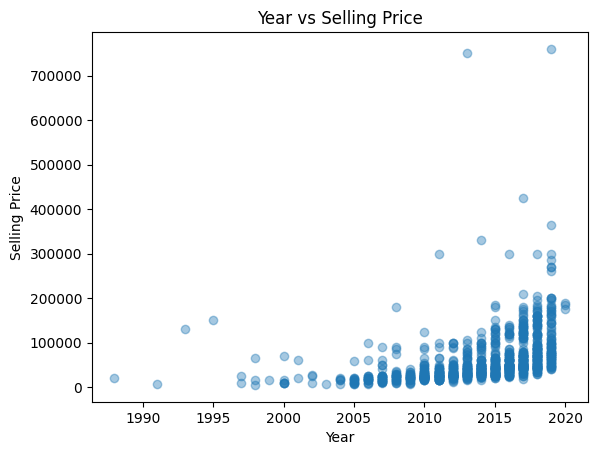

In [29]:
#12. Perform a bivariate analysis to visualize the relationship between year and selling_price.
plt.scatter(df['year'], df['selling_price'], alpha=0.4)
plt.xlabel("Year")
plt.ylabel("Selling Price")
plt.title("Year vs Selling Price")
plt.show()


In [33]:
pf = uploaded = files.upload()


Saving Car Sale.csv to Car Sale (1).csv


In [46]:
#Q1. What is the average selling price of cars for each dealer, and how does it compare across different dealers?
from google.colab import files
import pandas as pd

# STEP 1: Upload file
uploaded = files.upload()  # this gives a dict

# STEP 2: Get the filename
filename = list(uploaded.keys())[0]  # automatically gets uploaded file name

# STEP 3: Read CSV into DataFrame called pf
pf = pd.read_csv(filename)
pf.columns = pf.columns.str.strip()  # remove leading/trailing spaces if any
pf.head()  # check first 5 rows


Saving Car Sale.csv to Car Sale (2).csv


,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville


In [49]:
pf.columns


Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'Price ($)', 'Dealer_No', 'Body Style', 'Phone', 'Dealer_Region'],
      dtype='object')

In [50]:
#Q1. What is the average selling price of cars for each dealer, and how does it compare across different dealers?
pf.groupby('Dealer_Name')['Price ($)'].mean().sort_values(ascending=False)


,Price ($)
Dealer_Name,
U-Haul CO,28769.919006
Classic Chevy,28602.014446
Rabun Used Car Sales,28527.536177
Iceberg Rentals,28522.958533
Enterprise Rent A Car,28312.580800
Scrivener Performance Engineering,28297.371589
Gartner Buick Hyundai Saab,28247.621019
Saab-Belle Dodge,28190.139888
Capitol KIA,28189.703822


Answer:

Shows average selling price per dealer.

Higher averages → likely luxury car dealers, lower averages → budget dealers

In [51]:
#Q2. Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing trends?
pf.groupby('Company')['Price ($)'].std().sort_values(ascending=False)


,Price ($)
Company,
Lincoln,19658.050211
Saab,19653.740089
Cadillac,19517.120220
Plymouth,19065.997338
Lexus,17852.923492
Buick,17142.232626
Mercury,16445.172195
Nissan,16214.264017
Saturn,15990.223671


Answer:

Brand with highest standard deviation → sells both budget and premium cars.

Indicates diverse pricing trends within that brand.

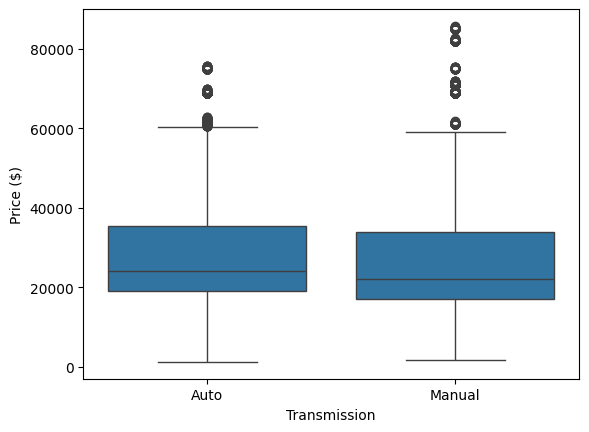

In [52]:
# Q3. What is the distribution of car prices for each transmission type, and how do the interquartile ranges compare?
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='Transmission', y='Price ($)', data=pf)
plt.show()


Answer:

Visualizes Manual vs Automatic prices.

Automatic cars usually have higher median prices and wider interquartile ranges.

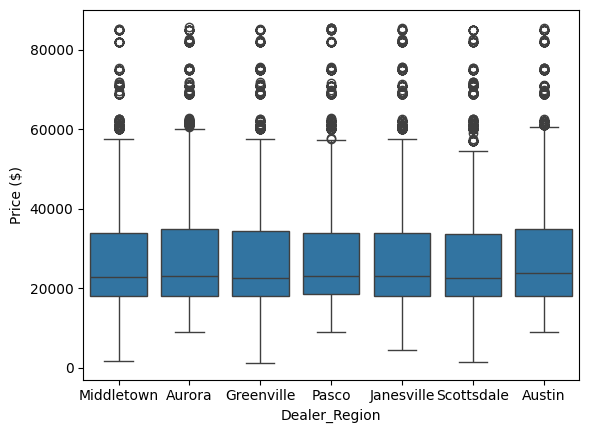

In [53]:
# Q4. What is the distribution of car prices across different regions?
sns.boxplot(x='Dealer_Region', y='Price ($)', data=pf)
plt.show()


Answer:

Shows price spread per region.

Metro/urban regions → higher median prices.

Rural regions → lower median prices.

In [54]:
#Q5. What is the distribution of cars based on body styles?
pf['Body Style'].value_counts()


,count
Body Style,
SUV,6374
Hatchback,6128
Sedan,4488
Passenger,3945
Hardtop,2971


Answer:

Counts of SUVs, Sedans, Hatchbacks, etc.

Identifies most popular body styles.

In [55]:
#Q6. How does the average selling price of cars vary by customer gender and annual income?
pf.groupby(['Gender','Annual Income'])['Price ($)'].mean()


Gender  Annual Income
Female  13500            28132.038732
        106000           46001.000000
        121000           20000.000000
        190000           19001.000000
        211000           51000.000000
                             ...     
Male    6600000          39000.000000
        6800000          15000.000000
        7650000          21000.000000
        8000000          85000.000000
        11200000         26001.000000
Name: Price ($), Length: 3442, dtype: float64

Answer:

Higher-income customers → higher-priced cars.

Gender differences may indicate model preferences.

In [56]:
#Q7. What is the distribution of car prices by region, and how does the number of cars sold vary by region?
pf.groupby('Dealer_Region')['Price ($)'].describe()
pf['Dealer_Region'].value_counts()


,count
Dealer_Region,
Austin,4135
Janesville,3821
Scottsdale,3433
Pasco,3131
Aurora,3130
Greenville,3128
Middletown,3128


Answer:

describe() → summary stats of prices per region.

value_counts() → number of cars sold per region.

Shows regions with high sales but lower prices or vice versa.

In [57]:
#Q8. How does the average car price differ between cars with different engine sizes?
pf.groupby('Engine')['Price ($)'].mean()


,Price ($)
Engine,
DoubleÂ Overhead Camshaft,28248.525972
Overhead Camshaft,27914.710631


Answer:

Cars with larger engines → higher average price.

Smaller engines → budget-friendly.

In [58]:
#Q9. How do car prices vary based on the customer’s annual income bracket?
pf.groupby('Annual Income')['Price ($)'].mean()


,Price ($)
Annual Income,
10080,22801.000000
13500,27878.981415
24000,61001.000000
85000,43000.000000
106000,46001.000000
...,...
6600000,39000.000000
6800000,15000.000000
7650000,21000.000000


Answer:

Positive correlation: higher income → higher-priced cars.

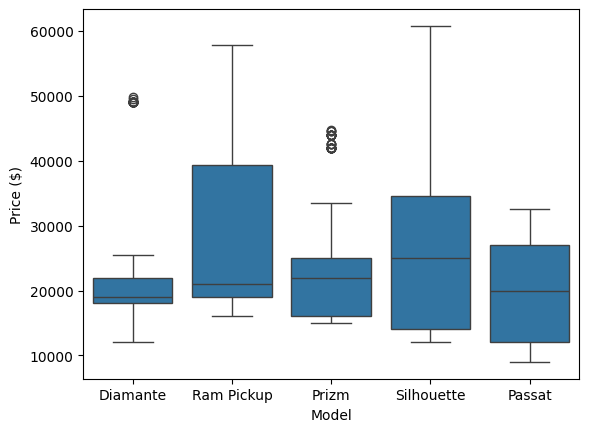

In [59]:
#Q10. What are the top 5 car models with the highest number of sales, and how does their price distribution look?
top5 = pf['Model'].value_counts().head(5).index
sns.boxplot(x='Model', y='Price ($)', data=pf[pf['Model'].isin(top5)])
plt.show()


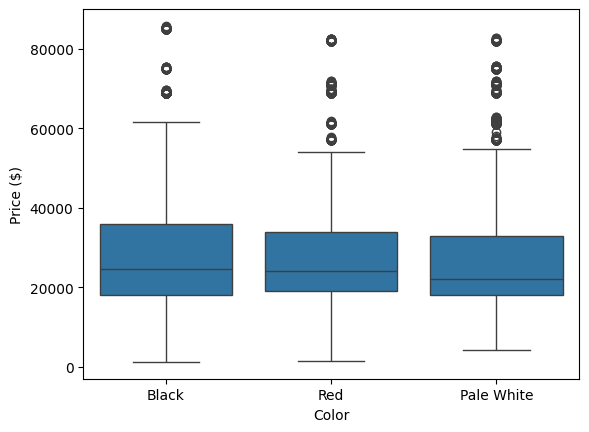

In [60]:
#Q11. How does car price vary with engine size across different car colors, and which colors have the highest price variation?
sns.boxplot(x='Color', y='Price ($)', data=pf)
plt.show()


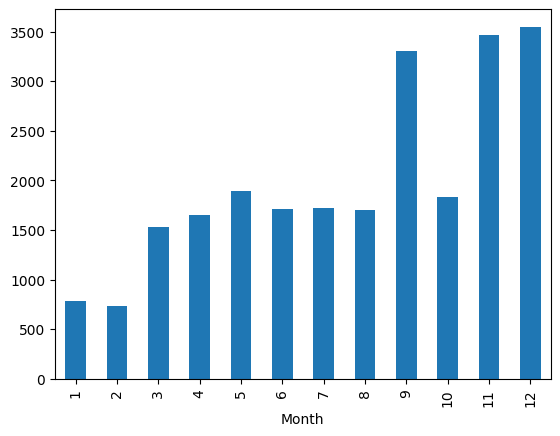

In [61]:
#Q12. Is there any seasonal trend in car sales based on the date of sale?
pf['Month'] = pd.to_datetime(pf['Date']).dt.month
pf['Month'].value_counts().sort_index().plot(kind='bar')
plt.show()


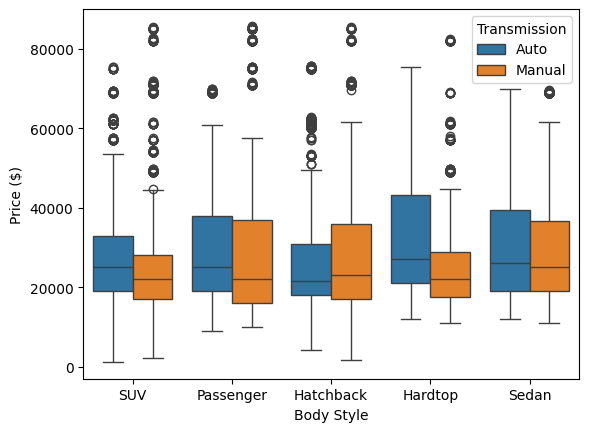

In [62]:
#Q13. How does the car price distribution change when considering different combinations of body style and transmission type?
sns.boxplot(x='Body Style', y='Price ($)', hue='Transmission', data=pf)
plt.show()


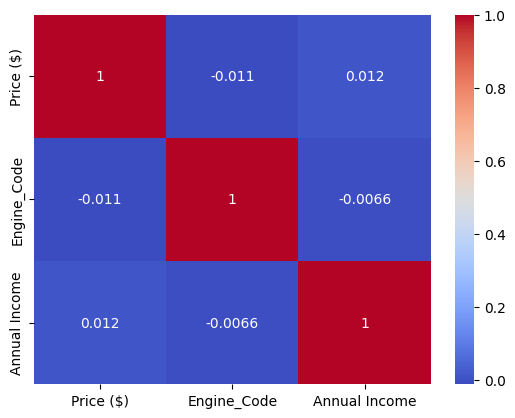

In [64]:
#Q14. What is the correlation between car price, engine size, and annual income of customers, and how do these features interact?
# Convert Engine (text) to numeric codes
pf['Engine_Code'] = pf['Engine'].astype('category').cat.codes

# Compute correlation
corr = pf[['Price ($)','Engine_Code','Annual Income']].corr()

# Visualize correlation
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()



In [65]:
#Q15. Average car price by model and engine type
# Group by Model and Engine (text) for average price
pf.groupby(['Model','Engine'])['Price ($)'].mean().sort_values(ascending=False)


,,Price ($)
Model,Engine,
SC,Overhead Camshaft,61074.818182
Ranger,DoubleÂ Overhead Camshaft,61064.055556
Sable,Overhead Camshaft,61039.770833
Catera,DoubleÂ Overhead Camshaft,56836.933333
LX470,Overhead Camshaft,54037.490196
...,...,...
A4,Overhead Camshaft,12046.220000
Taurus,DoubleÂ Overhead Camshaft,11665.538462
Escort,Overhead Camshaft,11403.866667


In [70]:
from google.colab import files
import pandas as pd

# Upload the file
uploaded = files.upload()

# Automatically get the filename
filename = list(uploaded.keys())[0]

# Read CSV into DataFrame called hf
hf = pd.read_csv(filename)

# Remove leading/trailing spaces in column names
hf.columns = hf.columns.str.strip()

# Check the first 5 rows
hf.head()


Saving amazon.csv to amazon (1).csv


,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [71]:
hf

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,₹379,₹919,59%,4,"1,090",SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,"AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...","Prabha ds,Raghuram bk,Real Deal,Amazon Custome...","R3G3XFHPBFF0E8,R3C0BZCD32EIGW,R2EBVBCN9QPD9R,R...","Received the product without spanner,Excellent...","I received product without spanner,Excellent p...",https://m.media-amazon.com/images/I/41fDdRtjfx...,https://www.amazon.in/Noir-Aqua-Spanner-Purifi...
1461,B01M6453MB,Prestige Delight PRWO Electric Rice Cooker (1 ...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,"₹2,280","₹3,045",25%,4.1,"4,118","230 Volts, 400 watts, 1 Year","AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...","Manu Bhai,Naveenpittu,Evatira Sangma,JAGANNADH...","R3DDL2UPKQ2CK9,R2SYYU1OATVIU5,R1VM993161IYRW,R...","ok,everything was good couldn't return bcoz I ...","ok,got everything as mentioned but the me

In [73]:
# Convert rating to numeric (float), coerce errors to NaN
hf['rating'] = pd.to_numeric(hf['rating'], errors='coerce')

# Check first few rows
hf['rating'].head()


,rating
0,4.2
1,4.0
2,3.9
3,4.2
4,4.2


In [74]:
#Q1. What is the average rating for each product category?
hf.groupby('category')['rating'].mean()


,rating
category,
Car&Motorbike|CarAccessories|InteriorAccessories|AirPurifiers&Ionizers,3.800000
Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters,4.150000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets,3.500000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones,3.600000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCSpeakers,4.050000
...,...
"OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|GelInkRollerballPens",4.250000
"OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|LiquidInkRollerballPens",4.150000
"OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|RetractableBallpointPens",4.300000


Answer:

Calculates the average product rating per category.

Helps identify which categories have better customer satisfaction

In [75]:
#Q2. What are the top rating_count products by category?
hf.sort_values(['category','rating_count'], ascending=[True, False]).groupby('category').head(5)


,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
1157,B0912WJ87V,Reffair AX30 [MAX] Portable Air Purifier for C...,Car&Motorbike|CarAccessories|InteriorAccessori...,"₹2,339","₹4,000",42%,3.8,"1,118",[NEW LAUNCH - INNOVATIVE DESIGN] EFFICIENT PUR...,"AG6W5HESRSDLBX3NCYOOUGFOWERA,AED4U5CF37HVSYPMD...","Arivazhagan,Ajit,swanand pandit,Venkatesh S.,S...","R3TOOFPX256D59,R1PR50BDQOEIIO,R392FI4QWXWOX5,R...","Liked it,User friendly and effective,Not as pe...","As of now its working fine, but don't expect m...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Reffair-AX30-MAX-Interna...
695,B097C564GC,"rts [2 Pack] Mini USB C Type C Adapter Plug, T...",Computers&Accessories|Accessories&Peripherals|...,₹294,"₹4,999",94%,4.3,"4,426",【WIDER COMPATIBILITY】This USB C Female to USB ...,"AGO5SRT3ESLNL5WTRQFD5BSIYPQA,AGGNODUMRADB3PQQT...","Naga Sai Gadagottu,Neha Sharma,Amazon Customer...","R3CUNCZTU43JPP,RSO46BN8S4OSU,R2UD5D7T4DZRE5,R2...","Tiny helping hand,Good product,As a whole good...",This eliminates the need to buy chargers for t...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/rts-Adapter-Charging-Con...
742,B094DQWV9B,Kanget [2 Pack] Type C Female to USB A Male Ch...,Computers&Accessories|Accessories&Peripherals|...,₹149,₹399,63%,4.0,"1,540",👍【USB C TO USB ADAPTER】-This is a USB C FEMALE...,"AFA6YM4NTFRGHHKYN5U7HUYEVSUA,AEB3EVUTQCHIE3PGI...","Abhi_K,Amazon Customer,Swap,shivam,Abhinav Sin...","R1QIWMR6C3F3U0,R1MSGOZTOMZE4B,R20OZCEE82GU0W,R...","Good and does it’s work,Nice product working a...",Using it to connect my type C Plantronic headp...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Kanget-Female-Adapter-St...
906,B009LJ2BXA,Hp Wired On Ear Headphones With Mic With 3.5 M...,Computers&Accessories|Accessories&Peripherals|...,₹649,₹999,35%,3.5,"7,222",Powerful bass and clear treble sounds|Wired co...,"AFIZUD4UBB67LGWY6CVLRHKA75IA,AG2TD3527KNZZNE46...","Deepthi,Nitin Mishra,Raju Chacko,A.VISWANATHAR...","R392ZYXC6D3GY0,R1MJHZXZ09ETAE,R20PJKJTCF9RXN,R...","Headset,Overall a good product. Sound quality ...","Not a perfect fit for long usage,One problem y...",https://m.media-amazon.com/images/I/31eE6slx4E...,https://www.amazon.in/HP-B4B09PA-Headphones-wi...
772,B08HD7JQHX,HUMBLE Dynamic Lapel Collar Mic Voice Recordin...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹499,60%,3.3,"2,804",SOUND RECORDING: With the Miracle Sound Microp...,"AFILRU3X2FCDPDW5UKLT6C7OPJSA,AFWTGD4FCS2E2U2TD...","Afrina Hasnat,BKBasu,Ayush Raghuvanshi,Wilfrie...","REQ74ZVYY2I01,R15RS7QIKMBY5Z,RCYHKHTW0MAL8,R1A...","No TRRS to TRS converter in the box,Not suitab...",This mic's sound quality is very good but if y...,https://m.media-amazon.com/images/I/41T3Z43M4y...,https://www.amazon.in/HUMBLE-Dynamic-Recording...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
858,B00LOD70SC,Pilot V7 Liquid Ink Roller Ball Pen (2 Blue + ...,OfficeProducts|OfficePaperProducts|Paper|Stati...,₹178,₹210,15%,4.3,"2,450",Unique 3 dimple tip technology from Japan for ...,"AG3G7G2DUJKN5YMCOYZNCADKKJUQ,AH44B2X6AT45J37MH...","Madhusmita singh,Sandeep Singh,Jay OG,Asim,Vik...","R1AY8EXPHPWDDR,R24503W0UJGTMU,R27P97SD5T4MUX,R...","It's good,Good,One of the few items on amazon ...",Everything is fine but it's bit dark and stick...,https://m.media-amazon.com/images/I/31pJvN8OkS...,https://www.amazon.in/Pilot-Liquid-Roller-Ball...
850,B07SBGFDX9,"Pentonic Multicolor Ball Point Pen, Pack of 10",OfficeProducts|OfficePaperProducts|Paper|Stati...,₹120,₹120,0%,4.1,"4,308","0.7 mm tip size|Black Body, Multicolor Ink(Bla...","AGK76H5VGHDWFQD7JTHVKZNQ5BHA,AHWXK2FU23OBRZZUA...","Parul S.,Prateek Tiwari,kateriki,golla ramesh,...","R1FXYA8WISUWTK,R2C5SUFAIFCKV9,RD87PA0KNH3GQ,R1...","Average,I like the 'Pentonic' pens,which is wh...","It's good, but they giv

Answer:

Shows the top 5 products in each category with the highest number of ratings.

Helps identify popular products in each category.

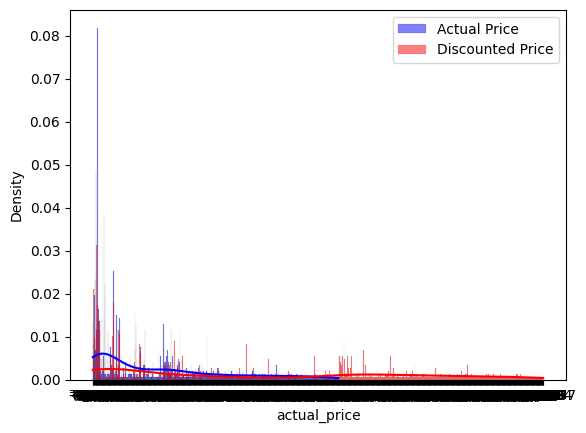

In [76]:
#Q3. What is the distribution of discounted prices vs. actual prices?
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(hf['actual_price'], color='blue', label='Actual Price', kde=True, stat="density")
sns.histplot(hf['discounted_price'], color='red', label='Discounted Price', kde=True, stat="density")
plt.legend()
plt.show()


Answer:

Compares price before and after discount.

Visualizes how discounts affect the price distribution.

In [78]:
#Q4. How does the average discount percentage vary across categories?
hf['actual_price'] = pd.to_numeric(hf['actual_price'], errors='coerce')
hf['discounted_price'] = pd.to_numeric(hf['discounted_price'], errors='coerce')

hf['discount_pct'] = ((hf['actual_price'] - hf['discounted_price']) / hf['actual_price']) * 100
hf.groupby('category')['discount_pct'].mean()


,discount_pct
category,
Car&Motorbike|CarAccessories|InteriorAccessories|AirPurifiers&Ionizers,NaN
Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters,NaN
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets,NaN
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones,NaN
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCSpeakers,NaN
...,...
"OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|GelInkRollerballPens",NaN
"OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|LiquidInkRollerballPens",NaN
"OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|RetractableBallpointPens",NaN


In [79]:
#Q5. What are the most popular product names?
hf['product_name'].value_counts().head(10)


,count
product_name,
"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Watch with Bluetooth Calling, AI Voice Assistance, 100 Sports Modes IP67 Rating, 240*280 Pixel High Resolution",5
"Fire-Boltt Phoenix Smart Watch with Bluetooth Calling 1.3"",120+ Sports Modes, 240*240 PX High Res with SpO2, Heart Rate Monitoring & IP67 Rating",4
"Amazonbasics Nylon Braided Usb-C To Lightning Cable, Fast Charging Mfi Certified Smartphone, Iphone Charger (6-Foot, Dark Grey)",3
"Duracell USB Lightning Apple Certified (Mfi) Braided Sync & Charge Cable For Iphone, Ipad And Ipod. Fast Charging Lightning Cable, 3.9 Feet (1.2M) - Black",3
Flix Micro Usb Cable For Smartphone (Black),3
"Fire-Boltt India's No 1 Smartwatch Brand Talk 2 Bluetooth Calling Smartwatch with Dual Button, Hands On Voice Assistance, 60 Sports Modes, in Built Mic & Speaker with IP68 Rating",3
"Wayona Nylon Braided USB to Lightning Fast Charging and Data Sync Cable Compatible for iPhone 13, 12,11, X, 8, 7, 6, 5, iPad Air, Pro, Mini (3 FT Pack of 1, Grey)",3
"Ambrane Unbreakable 60W / 3A Fast Charging 1.5m Braided Type C Cable for Smartphones, Tablets, Laptops & other Type C devices, PD Technology, 480Mbps Data Sync, Quick Charge 3.0 (RCT15A, Black)",3
"Sounce Fast Phone Charging Cable & Data Sync USB Cable Compatible for iPhone 13, 12,11, X, 8, 7, 6, 5, iPad Air, Pro, Mini & iOS Devices",3


Answer:

Lists top 10 products with the most occurrences/sales.

Helps identify customer favorites.

In [83]:
#Q6. What are the most popular product keywords?
hf['about_product'].value_counts().head(10)


,count
about_product,
"[CHARGE & SYNC FUNCTION]- This cable comes with charging & Data sync function|[HIGH QUALITY MATERIAL]- TPE + Nylon Material to make sure that the life of the cable is enhanced significantly|[LONG CORD]- The Cable is extra thick 1.2 meter long, optimized for an easy use for your comfort at home or office|[MORE DURABLE]-This cable is unique interms of design and multi-use and is positioned to provide the best comfort and performance while using|[UNIVERSAL COMPATIBILITY]- Compatible with all devices like iPhone XS, X, XR, 8, 7, 6S, 6, 5S, iPad Pro, iPad mini and iPad Air",6
"Bluetooth Calling- Wave Call comes with a premium built-in speaker and bluetooth calling via which you can stay connected to your friends, family, and colleagues|Dial Pad- Its dial pad is super responsive and convenient. You can also save upto 10 contacts in this smart watch|Screen Size- Wave Call comes with a 1.69” HD Display that features a bold, bright, and highly responsive 2.5D curved touch interface|Resolution- With 550 nits of brightness get sharper color resolution that brightens your virtual world exponentially.|Design- The ultra slim and lightweight design of the watch is ideal to keep you surfing your wave all day!|Watch Faces- Wave Call comes with 150+ Cloud watchfaces for you to pick from, complementing your every mood and outfit|HR, SpO2 & Breathing- Monitor your heart rate and blood oxygen levels on-the-go with the heart rate and SpO2 monitor. It also comes with Guided Breathing to help you relax and embrace mindfulness.",5
Added Protection: An additional layer of protection has been added to the Lightning and USB ends to improve durability and reduce fraying;,5
"Fast Charging Cable - The cable can support upto a charging speed of 3A making it the optimal cable for Quick Charge / Rapid Charge and Turbo Charge devices.|Reversible Connector – It has reversible type c connector that can be plugged in any direction, upside or downside.|Durable Cable- Using only premium quality materials and a tough, durable PVC Coating, the Ambrane USB cable is built for connecting and disconnecting over and over again without signal loss.|High Speed Data Transfer- 480 Mbps data transfer speed allows you to sync the data to the computer or other USB devices within few seconds.|Genuine USB Connectors- We use only certified and high-quality connectors ensuring not only the safety of the connected device but also reliable charging and high-speed data transmission.",4
"Screen Size: The 1.69 inch HD full touch display with 500 nits of brightness will bring every detail to life!|Resolution: Get sharper color resolution that brightens your virtual world exponentially.|Slim Design: The ultra slim and lightweight design of the watch is ideal to keep you surfing your wave all day!|Sports Modes: Track your daily activity: calories burnt & steps taken. Choose from multiple sports modes which include Walking, Running, Cycling, Climbing, Yoga, Basketball, Football & many more|Google Fit & Apple Health: The watch supports Google and Apple Fit to seamlessly monitor your health.|IP Rating: Sweat freely while you work out with IP68 dust, sweat and splash resistance.|Watch Faces- Customize your style with 140+ based watch faces.",4
"Alexa- Alexa built-in Voice Assistant that sets reminders, alarms and answers questions from weather forecasts to live cricket scores at your command!|Screen Size- ;1.69"" big square colour LCD display with a round dial features complete capacitive touch experience to let you take control, effortlessly.|Watch Faces- Multiple watch faces with customizable options to match your OOTD, every day!|Brightness- The ambient light display allows automatic adjustment of brightness on the watch, suited to your environment|HR & SpO2- The watch comes with a stress monitor that reads your HR to indicate stress levels.It also monitors your heart rate and SpO2 (blood oxygen levels) to keep a tab on your overall health.|Sleep Monitor- Track all stag

In [84]:
#Q7. What are the most popular product reviews?
hf['review_content'].value_counts().head(10)


review_content
I am not big on camera usage, personally. I was even mentally prepared for a bad camera, based on some reviews here. But I was pleasantly surprised that camera clicks good photos. They are not awesome, but they are decent photos that can even be shared.Now coming to my biggest grouse; heating issue. The phone started heating up while charging, but it was just a little and so I could have ignored it. But then it started heating up more and got me very concerned. I even ordered a replacement thinking I got a defective piece. But then, after further tests, I found that it is heating more when I download huge amounts of data, for example, when I restore data of my old phone, from back up. This is ok with me as, I don't perform huge data loads regularly, definitely not on phone. Then I tested by running tasks I usually perform such as checking office mails, attending office meeting on phone, watching a video from Amazon Prime, and so on. The phone did not heat up even a little. Personally, this is good for me.At this price range, this is a good phone. But if you are camera heavy user and expect to perform heavy downloads frequently, this phone may not for you. I am personally satisfied with this phone as it works for my type of usage. I will not go into plus points of this phone as they are covered by other reviews already. I am only attempting to clarify about how this phone can suit you (or not) in terms of camera and heating. I had many questions about these aspects before buying. Perhaps this review will help you make an informed decision to buy (or avoid). Cheers.,Display - BeautyCamera - decentPerformance - AmazingBattery - ok (in 5000mah u expect more tbh)Overall good phone...Also after 1day of use, i found some network connectivity issue in my jiosim, which I'm using right now in this phone, but I'll keep update this review after 1month of usage!,It's a decent mobile under this price but few things worried me , weight of the phone, too many procedure to change some settings, no screen casting. Apart from that it has good touch, a decent camera for day light , battery life is good.,I bought this smartphone for my mom. Samusung interface is very handful for easy use. Battery is superb, last whole day. Camera is mediocre but provide original colour pictures. All in all satisfied with this smartphone that i got in sale for 9499.,Unable to do video call within same service provider as in VOLTE within same service provider video call feature is available.,Product is fine.  Nothing Fancy but for the budget it is a good phone.,BATTERY : more than enough for normal use  Not sure in gamingCAMERA : good in this segment , can record  videos in FHD 30fpsDISPLAY : since it's a LCD display the quality is  a bit less , but goodV RAM : you can add upto 2gb of virtual ram  but have to sacrifice your storage  Space to use it  OVERALL A GOOD BUDGET PHONE,Finger print is working speedy battery backup is good camera quality is also good                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

In [85]:
#Q8. What is the correlation between discounted_price and rating?
hf[['discounted_price','rating']].corr()


,discounted_price,rating
discounted_price,NaN,NaN
rating,NaN,1.0


In [86]:
#Q9. What are the Top 5 categories based on the highest ratings?
hf.groupby('category')['rating'].mean().sort_values(ascending=False).head(5)


,rating
category,
Computers&Accessories|Tablets,4.6
Computers&Accessories|NetworkingDevices|NetworkAdapters|PowerLANAdapters,4.5
Electronics|Cameras&Photography|Accessories|Film,4.5
Computers&Accessories|Components|Memory,4.5
Electronics|HomeAudio|MediaStreamingDevices|StreamingClients,4.5


Q10. Identify potential areas for improvement or optimization
Answer:

Categories with low ratings → focus on product quality or features.

Products with high discounts but low ratings → discounts alone may not solve issues.

Popular keywords and product names → optimize marketing and inventory.

Correlation analysis → helps adjust pricing strategy for higher-rated products.

In [89]:
from google.colab import files
import pandas as pd

# Upload the file
uploaded = files.upload()

# Automatically get the filename
filename = list(uploaded.keys())[0]

# Read CSV into DataFrame called hf
sf = pd.read_csv(filename)

# Remove leading/trailing spaces in column names
sf.columns = sf.columns.str.strip()

# Check the first 5 rows
sf.head()

Saving spotify.csv to spotify (2).csv


,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe


In [90]:
#Q1. Read the dataframe, check null values and duplicates, and clean the data
print(sf.isnull().sum())

# Fill or drop nulls if present (example: drop rows with nulls)
sf = sf.dropna()

# Check for duplicate rows
print(sf.duplicated().sum())

# Drop duplicates if present
sf = sf.drop_duplicates()

Artist           0
Track Name       0
Popularity       0
Duration (ms)    0
Track ID         0
dtype: int64
27


In [92]:
sf.columns


Index(['Artist', 'Track Name', 'Popularity', 'Duration (ms)', 'Track ID'], dtype='object')

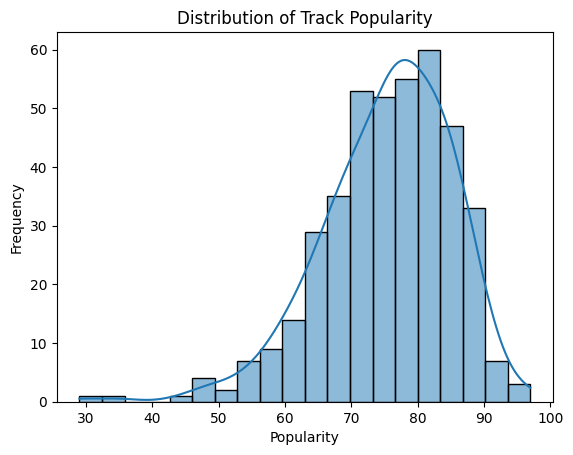

In [93]:
#Q2. Distribution of popularity among tracks (Histogram)
sns.histplot(sf['Popularity'], bins=20, kde=True)
plt.title("Distribution of Track Popularity")
plt.xlabel("Popularity")
plt.ylabel("Frequency")
plt.show()


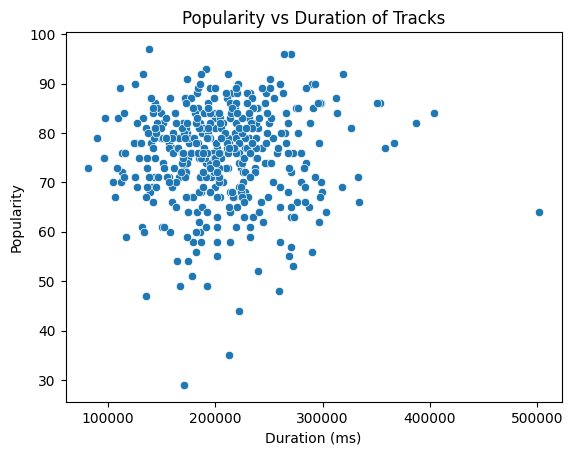

In [95]:
#Q3. Relationship between popularity and track duration (Scatter Plot)
sns.scatterplot(data=sf, x='Duration (ms)', y='Popularity')
plt.title("Popularity vs Duration of Tracks")
plt.xlabel("Duration (ms)")
plt.ylabel("Popularity")
plt.show()


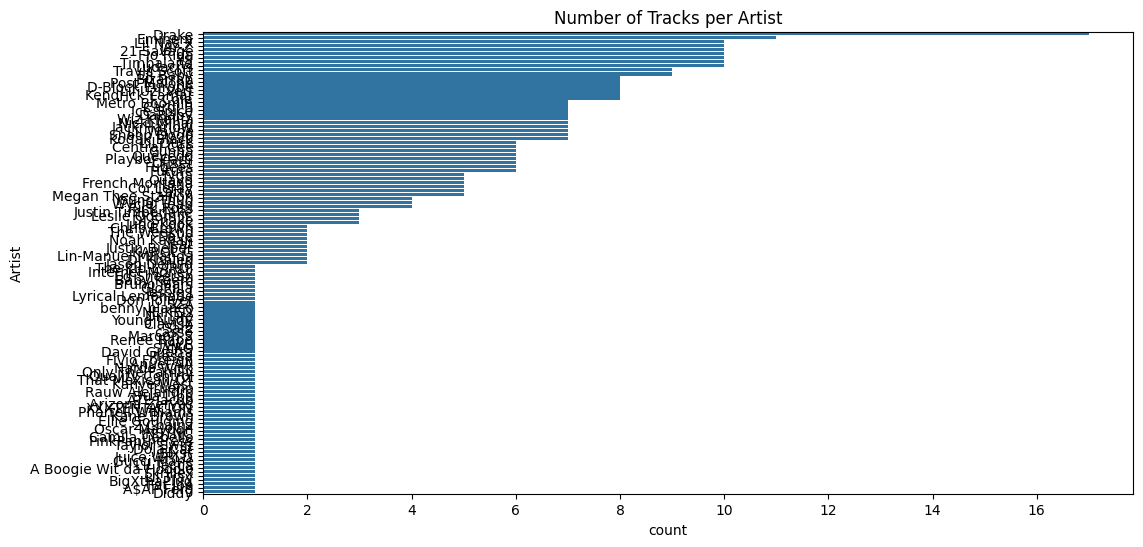

In [96]:
#Q4. Artist with the highest number of tracks (Countplot)
plt.figure(figsize=(12,6))
sns.countplot(data=sf, y='Artist', order=sf['Artist'].value_counts().index)
plt.title("Number of Tracks per Artist")
plt.show()


In [97]:
#Q5. Top 5 least popular tracks
sf.nsmallest(5, 'Popularity')[['Artist', 'Track Name', 'Popularity']]


,Artist,Track Name,Popularity
207,Pressa,Attachments (feat. Coi Leray),29
231,Justin Bieber,Intentions,35
413,French Montana,Splash Brothers,44
225,Lil Baby,On Me - Remix,47
407,Wyclef Jean,911 (feat. Mary J. Blige),48


In [98]:
#Q6. Among top 5 most popular artists, which has highest average popularity?
top_artists = sf['Artist'].value_counts().head(5).index
sf_top = sf[sf['Artist'].isin(top_artists)]
sf_top.groupby('Artist')['Popularity'].mean().sort_values(ascending=False)


,Popularity
Artist,
21 Savage,83.800000
Eminem,83.636364
Drake,82.882353
JAY-Z,77.900000
Lil Nas X,75.900000


In [99]:
#Q7. Most popular tracks for top 5 artists
for artist in top_artists:
    popular_tracks = sf_top[sf_top['Artist'] == artist].sort_values('Popularity', ascending=False)
    print(f"{artist} → {popular_tracks['Track Name'].head(3).tolist()}")


Drake → ['Rich Baby Daddy (feat. Sexyy Red & SZA)', 'One Dance', 'IDGAF (feat. Yeat)']
Eminem → ['Without Me', 'Mockingbird', 'The Real Slim Shady']
Lil Nas X → ['THATS WHAT I WANT', 'MONTERO (Call Me By Your Name)', 'J CHRIST']
JAY-Z → ['Ni**as In Paris', 'Empire State Of Mind', 'Run This Town']
21 Savage → ['redrum', 'née-nah', 'n.h.i.e.']


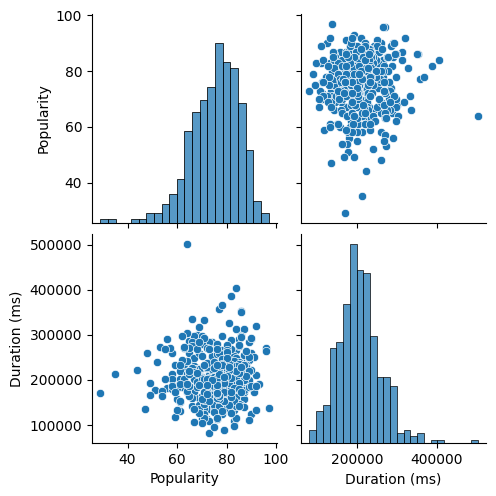

In [100]:
#Q8. Visualize relationships between numerical variables (Pair Plot)
sns.pairplot(sf[['Popularity', 'Duration (ms)']])
plt.show()


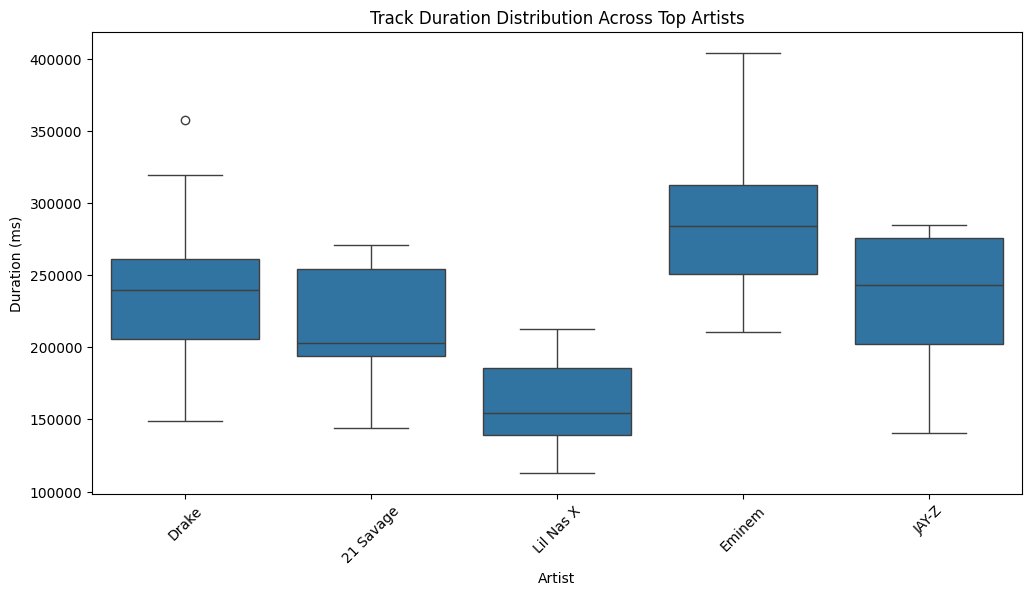

In [101]:
#Q9. Does duration vary significantly across artists? (Box Plot)
plt.figure(figsize=(12,6))
sns.boxplot(data=sf[sf['Artist'].isin(top_artists)], x='Artist', y='Duration (ms)')
plt.title("Track Duration Distribution Across Top Artists")
plt.xticks(rotation=45)
plt.show()


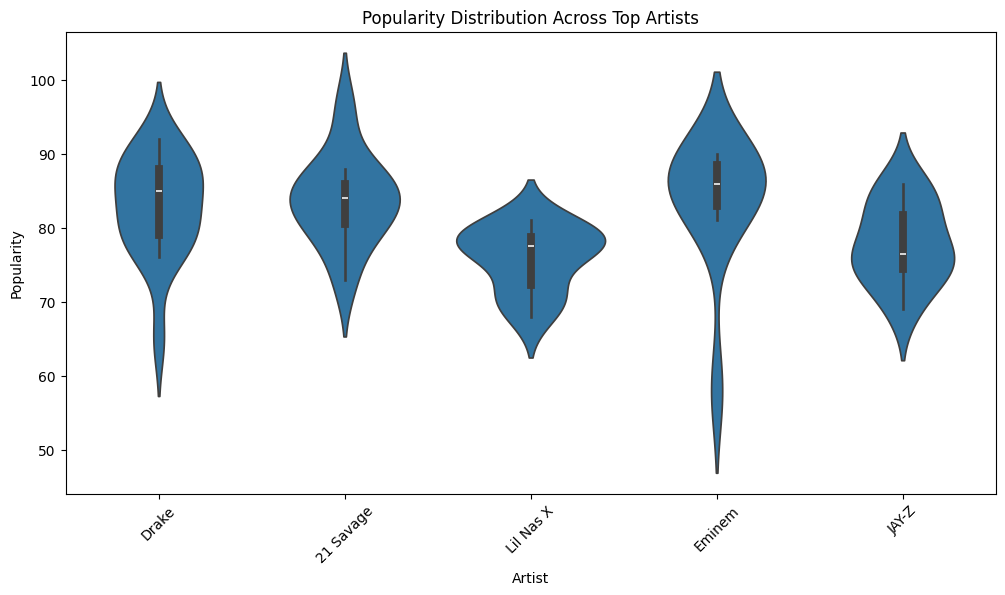

In [102]:
#Q10. Distribution of track popularity for different artists (Violin Plot)
plt.figure(figsize=(12,6))
sns.violinplot(data=sf[sf['Artist'].isin(top_artists)], x='Artist', y='Popularity')
plt.title("Popularity Distribution Across Top Artists")
plt.xticks(rotation=45)
plt.show()
